In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
plt.style.use('classic')
%matplotlib inline
sns.set()

In [2]:
# Import dataset
data = pd.read_csv("loan_final313.csv")
display(data.head())
display(data.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
# Select 9 main features
data0 = data.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18]]
display(data0.head())
display(data0.shape)

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


(887379, 9)

# Section 4.1 Relationship between income and home ownership

In [4]:
# Remove outliers in "home ownership"
data0 = data0[data0.home_ownership_cat < 4]

In [5]:
# Group by
data1 = data0.groupby('home_ownership_cat')['annual_inc'].describe()
display(data1)

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,356117.0,63982.475731,51153.882589,1200.0,40000.0,55000.0,76000.0,8900060.0
2,87470.0,68913.489974,62487.406227,4000.0,40000.0,56000.0,82000.0,8253000.0
3,443557.0,85105.722766,72767.844618,0.0,54000.0,73000.0,100000.0,9500000.0


In [6]:
# Prepare for the bar plot
table1 = data0.groupby('home_ownership_cat')['annual_inc'].mean().reset_index()
table2 = table1.rename(index={0: "Rent", 1: "Own", 2: "Mortgage"})
table3 = table2.rename(columns={"annual_inc": "Average annual income"})
display(table3)

,home_ownership_cat,Average annual income
Rent,1,63982.475731
Own,2,68913.489974
Mortgage,3,85105.722766


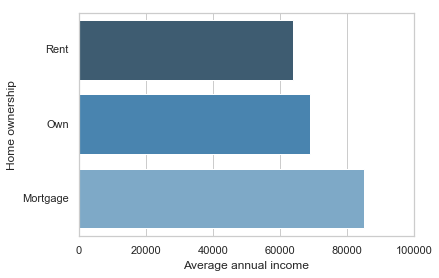

In [7]:
# Bar plot
with sns.axes_style('whitegrid'):
    g1 = sns.barplot(x="Average annual income", y=table3.index, data=table3, palette="Blues_d")
    g1.set(xlim=(0, 100000),xlabel="Average annual income", ylabel="Home ownership")
    g1.figure.savefig('inc_hom_rel.png')

* An interesting finding is that the average income of clients who bought a house with a mortgage have higher annual income than those who already own a house, by a relevantly large margin.

In [8]:
data0.groupby('home_ownership_cat')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,356117.0,12870.578770,7628.330822,500.0,7000.0,11200.0,17000.0,35000.0
2,87470.0,14222.819824,8338.293711,700.0,8000.0,12000.0,20000.0,35000.0
3,443557.0,16375.133917,8738.517757,500.0,10000.0,15000.0,22000.0,35000.0


* The loan amount of "Mortgage" and "Own" are higher than others. It makes sense since these clients have house property as collateral, the bank is willing to lend more money to them.

# Section 4.2 Relationship between loan condition and interest rate/income

In [9]:
# Group by 
data2 = data0.groupby('loan_condition_cat')['annual_inc'].describe()
data2 = data2.rename(index={0: "Good Loan", 1: "Bad Loan"})
display(data2)
data3 = data0.groupby('loan_condition_cat')['interest_rate'].describe()
display(data3)

,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
Good Loan,819761.0,75662.491019,64650.518415,0.0,46000.0,65000.0,90000.0,9500000.0
Bad Loan,67383.0,67334.343247,64829.606107,2000.0,42000.0,58000.0,80000.0,8900060.0


,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
0,819761.0,13.026164,4.314072,5.32,9.76,12.69,15.61,28.99
1,67383.0,15.928654,4.313832,5.32,12.99,15.61,18.75,28.99


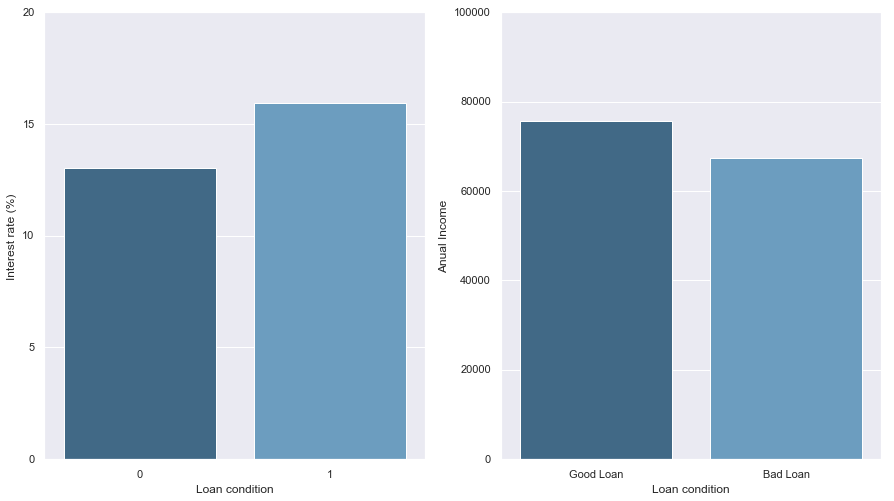

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
sns.set(style="whitegrid", font_scale=2)
g2 = sns.barplot(x=data3.index, y="mean", data=data3, palette="Blues_d", ax=ax1)
g2.set(ylim=(0, 20),xlabel="Loan condition", ylabel="Interest rate (%)")
g2 = sns.barplot(x=data2.index, y="mean", data=data2, palette="Blues_d", ax =ax2)
g2.set(ylim=(0, 100000),xlabel="Loan condition", ylabel="Anual Income")
plt.savefig('cond_2_cor.png')

* The interest rate of "Good Loan" category is averaging about 3% larger than that of "Bad Loan". This is reasonable because the higher the interest rate, the more likely the clients fail to pay the loan.
* The average annual income of clients who belonged to "Good Loan" category is higher than those belonged to "Bad Loan" by nearly 10,000 euro, which also accords with common sense.

# Section 4.3 - Relationship between purpose and income/loan amount

In [11]:
# Group by
data4 = data0.groupby('purpose_cat')['annual_inc'].describe()
display(data4)

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,206111.0,75103.425644,64185.987600,0.0,45000.0,65000.0,90000.0,9500000.0
2,8860.0,67887.613657,100979.751766,3000.0,40000.0,56080.0,80000.0,7000000.0
3,10363.0,89874.636399,73145.120819,6695.0,50000.0,72500.0,105000.0,1500000.0
4,42866.0,69788.243713,58828.350104,2000.0,40000.0,58000.0,82500.0,3964280.0
5,2346.0,69469.114237,47152.931253,7200.0,43000.0,60000.0,81629.0,900000.0
6,524137.0,73892.100239,61098.813355,0.0,45600.0,64000.0,90000.0,9000000.0
7,51814.0,90280.075231,88865.773146,7000.0,52000.0,75000.0,105000.0,7600000.0
8,17269.0,76697.274133,61980.424346,5000.0,45000.0,64668.0,92500.0,3000000.0
9,8535.0,72150.129584,94223.960517,7500.0,42180.0,60000.0,85000.0,7500000.0


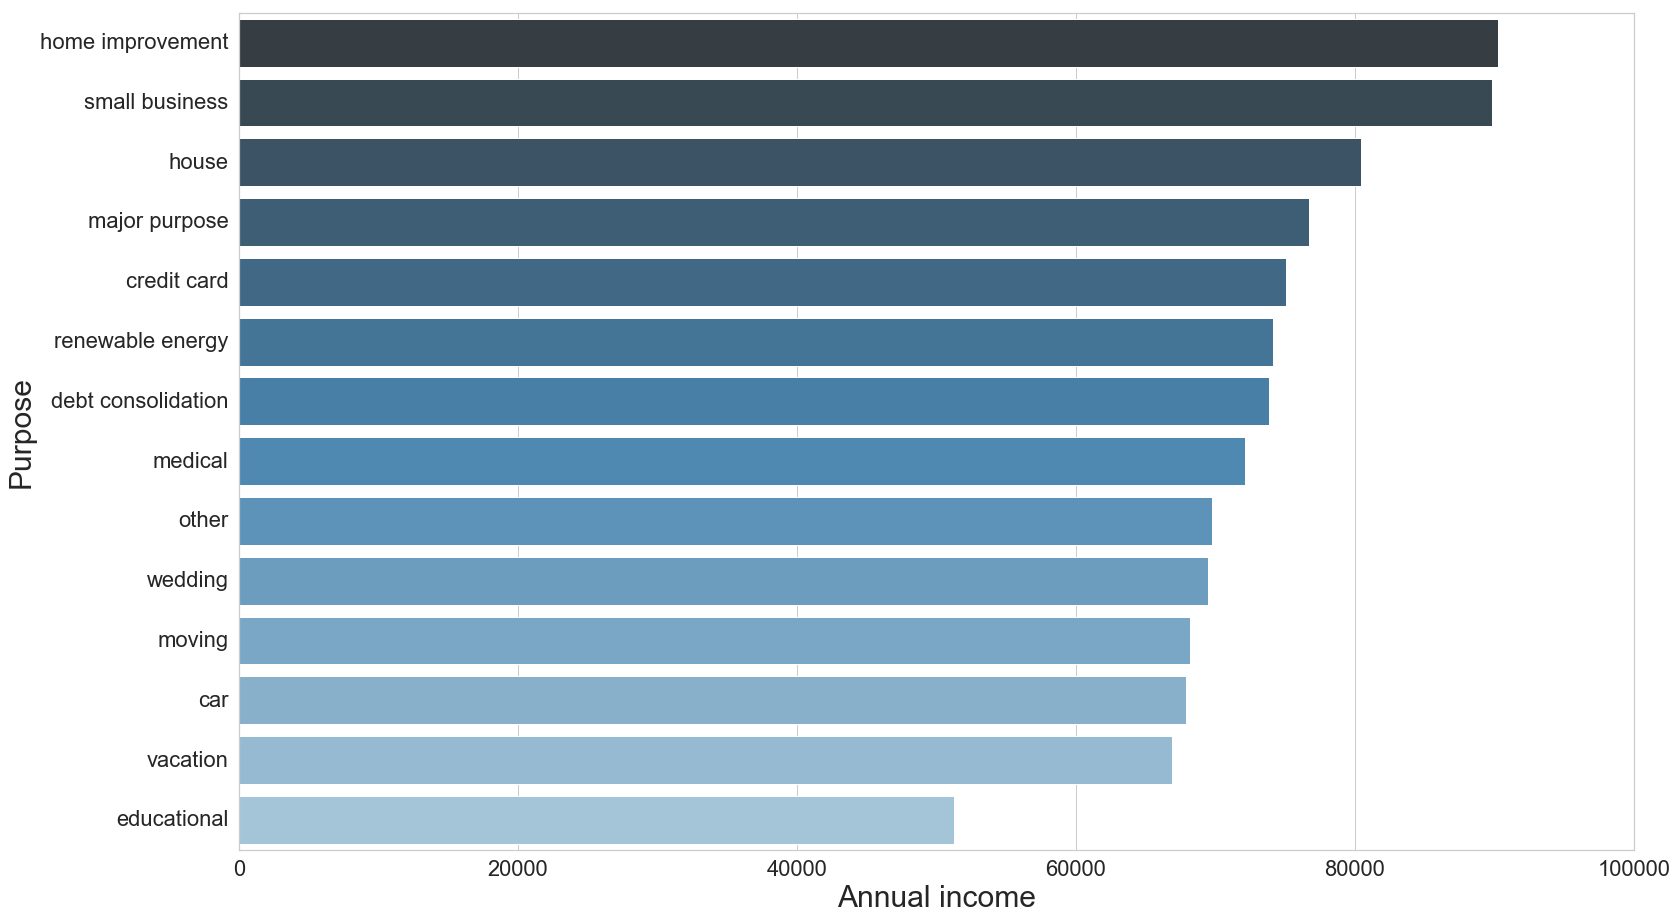

In [12]:
# Bar plot
data4 = data4.rename(index={1: "credit card", 2: "car", 3: "small business", 4: "other", 5: "wedding", 
                              6: "debt consolidation", 7: "home improvement", 8: "major purpose", 9: "medical", 
                              10: "moving", 11: "vacation", 12: "house", 13:"renewable energy", 14:"educational"})
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(25,15))
g4 = sns.barplot(x="mean", y=data4.index, data=data4, palette="Blues_d",order=data4.sort_values('mean',ascending = False).index)
g4.set(xlim=(0, 100000))
g4.set_ylabel("Purpose",fontsize=30)
g4.set_xlabel("Annual income",fontsize=30)
g4.figure.savefig('inc_pur_rel.png')

* Among all purposes, clients with loan purpose "home improvement" and "small business" have higher income than others. This makes senses, because people who own a small business or require home development is more likely to be wealthy.
* On the contrary, customers who applied for a loan due to education have the lowest average income, which is also reasonable since educational cost are basic expenditure for a family.

In [13]:
# Group by
data5 = data0.groupby('purpose_cat')['loan_amount'].describe()
display(data5)

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,206111.0,15339.922057,8288.357704,500.0,9000.0,14000.0,20000.0,35000.0
2,8860.0,8883.047404,6175.935841,1000.0,4800.0,7000.0,11500.0,35000.0
3,10363.0,15418.404420,9284.396949,500.0,8000.0,13750.0,21000.0,35000.0
4,42866.0,9890.750245,7512.657161,500.0,4450.0,8000.0,13500.0,35000.0
5,2346.0,10470.961211,6751.358739,1000.0,5500.0,9000.0,14000.0,35000.0
6,524137.0,15428.804063,8282.329239,700.0,9350.0,14175.0,20000.0,35000.0
7,51814.0,14321.823735,8921.358542,900.0,7000.0,12000.0,20000.0,35000.0
8,17269.0,11603.478777,8608.491406,1000.0,5000.0,9575.0,16000.0,35000.0
9,8535.0,9019.548916,6844.429397,850.0,4000.0,7000.0,12000.0,35000.0


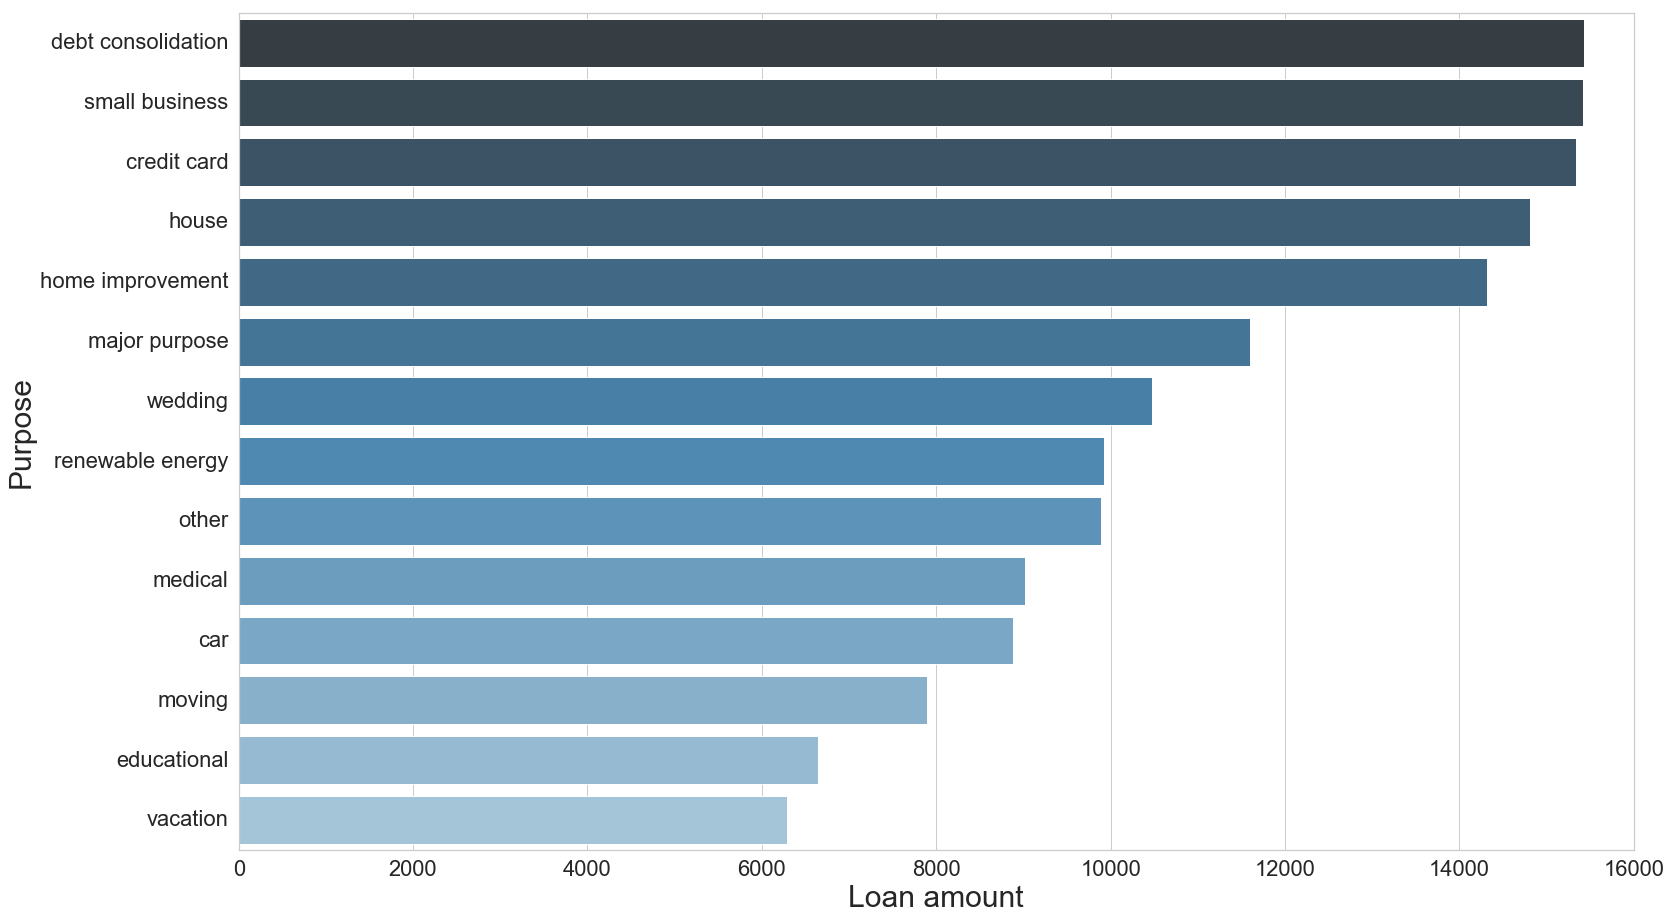

In [14]:
# Bar plot
data5 = data5.rename(index={1: "credit card", 2: "car", 3: "small business", 4: "other", 5: "wedding", 
                              6: "debt consolidation", 7: "home improvement", 8: "major purpose", 9: "medical", 
                              10: "moving", 11: "vacation", 12: "house", 13:"renewable energy", 14:"educational"})
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(25,15))
g5 = sns.barplot(x="mean", y=data5.index, data=data5, palette="Blues_d",order=data5.sort_values('mean',ascending = False).index)
g5.set(xlim=(0, 16000))
g5.set_ylabel("Purpose",fontsize=30)
g5.set_xlabel("Loan amount",fontsize=30)
g5.figure.savefig('amo_pur_rel.png')

* The loan amount of debt consolidation is averaging the highest among all the categories.

# Section 4.4 - relationship between employment length and loan amount

In [15]:
# Group by
data6 = data0.groupby('emp_length_int')['loan_amount'].describe()
display(data6)

,count,mean,std,min,25%,50%,75%,max
emp_length_int,,,,,,,,
0.50,70565.0,13800.750726,8290.258653,500.0,7500.0,12000.0,19125.0,35000.0
1.00,57071.0,13738.294405,8153.538107,500.0,7500.0,12000.0,18937.5,35000.0
2.00,78844.0,14016.890632,8206.228344,500.0,8000.0,12000.0,19425.0,35000.0
3.00,70007.0,14145.302970,8194.953849,500.0,8000.0,12000.0,19750.0,35000.0
4.00,52516.0,14264.020965,8231.255264,900.0,8000.0,12000.0,20000.0,35000.0
5.00,55690.0,14341.131262,8197.056048,1000.0,8000.0,12000.0,20000.0,35000.0
6.00,42934.0,14556.685843,8210.486315,1000.0,8000.0,12650.0,20000.0,35000.0
6.05,44821.0,11777.217710,7556.559413,1000.0,6000.0,10000.0,15925.0,35000.0
7.00,44587.0,14771.187790,8246.266357,500.0,8400.0,13200.0,20000.0,35000.0


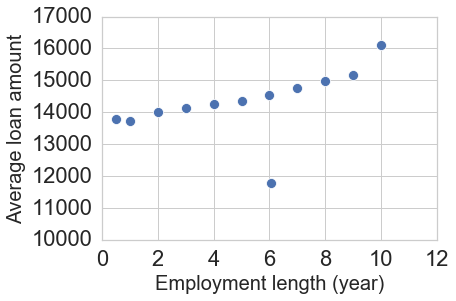

In [16]:
# Scatter plot
g6 = sns.scatterplot(x=data6.index, y="mean", data=data6,s=100)
g6.set_xlabel("Employment length (year)",fontsize=20)
g6.set_ylabel("Average loan amount",fontsize=20)
g6.set(ylim=(10000, 17000))
g6.figure.savefig('leng_amo_rel2.png')